<a href="https://colab.research.google.com/github/Musaddiq98/Data-Science-Assignments/blob/main/Neural_Network_Gas_Turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting turbine energy yield (TEY) using ambient variables as features.**

In [ ]:
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split

In [ ]:
gas = pd.read_csv("gas_turbines.csv")

In [ ]:
gas.head(4)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670


In [ ]:
gas.tail(4)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [ ]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
gas.shape

(15039, 11)

In [ ]:
gas.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


<AxesSubplot:>

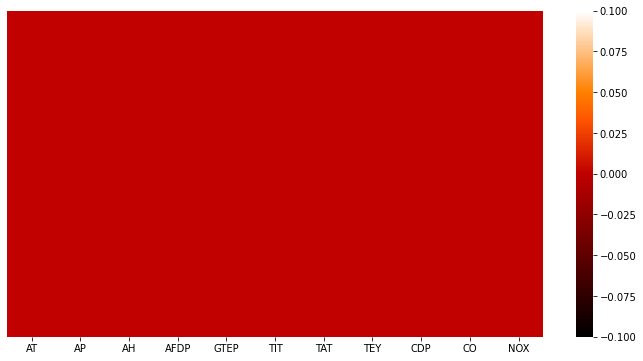

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(gas.isna(), cmap =('gist_heat'), yticklabels=False)

In [ ]:
gas[gas.duplicated()].shape

(0, 11)

In [ ]:
gas.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

#Data Visualization

<AxesSubplot:title={'center':'Distplot for TEY'}, xlabel='TEY', ylabel='Density'>

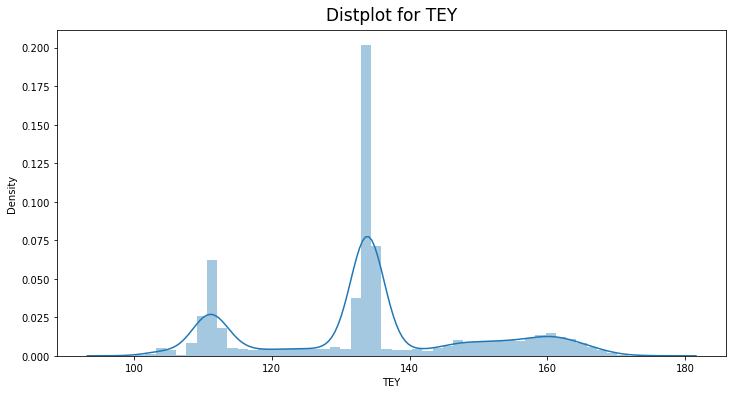

In [ ]:
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(gas['TEY'])

<AxesSubplot:title={'center':'Distplot for AT'}, xlabel='AT', ylabel='Density'>

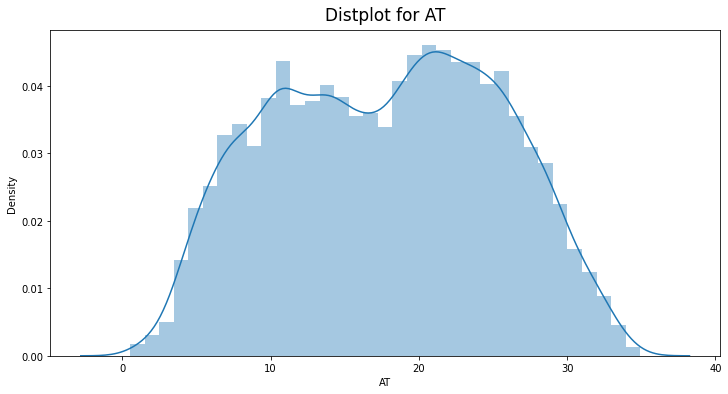

In [ ]:
plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(gas['AT'])

<AxesSubplot:title={'center':'Distplot for AP'}, xlabel='AP', ylabel='Density'>

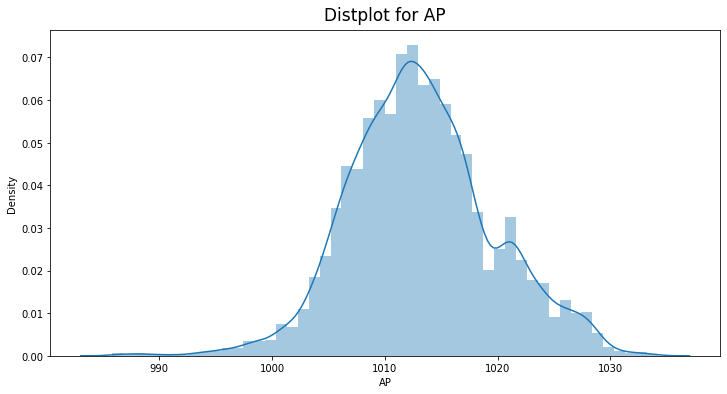

In [ ]:
plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(gas['AP'])

<AxesSubplot:title={'center':'Distplot for AH'}, xlabel='AH', ylabel='Density'>

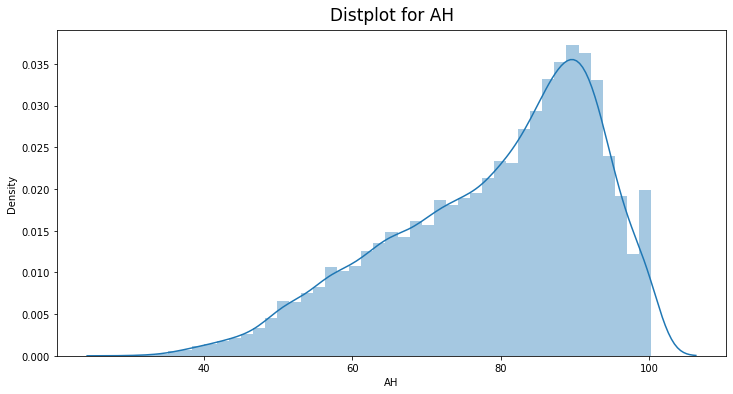

In [ ]:
plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(gas['AH'])

<AxesSubplot:title={'center':'Distplot for AFDP'}, xlabel='AFDP', ylabel='Density'>

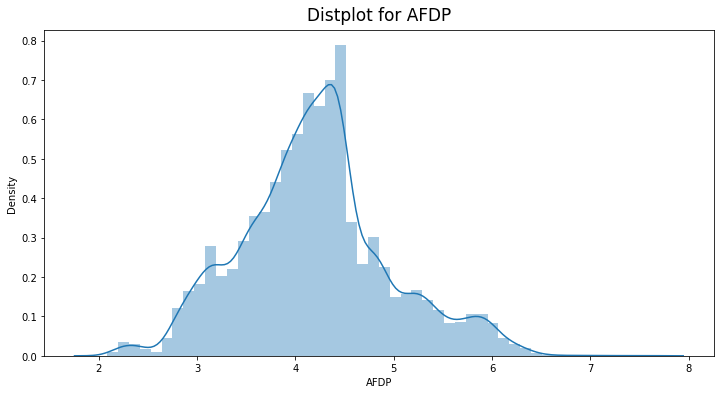

In [ ]:
plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(gas['AFDP'])

<AxesSubplot:title={'center':'Distplot for GTEP'}, xlabel='GTEP', ylabel='Density'>

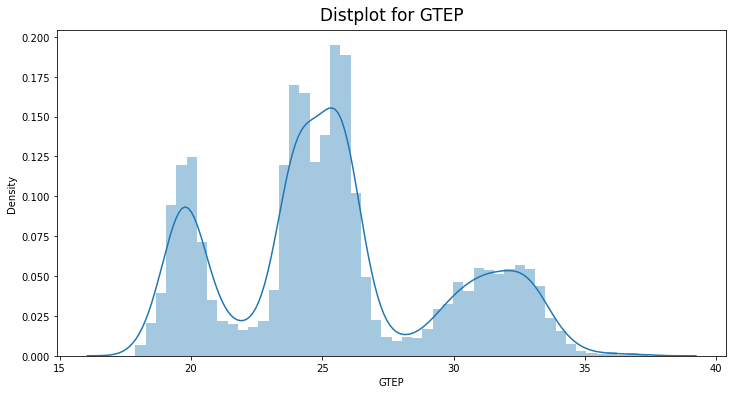

In [ ]:
plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(gas['GTEP'])

<AxesSubplot:title={'center':'Distplot for TIT'}, xlabel='TIT', ylabel='Density'>

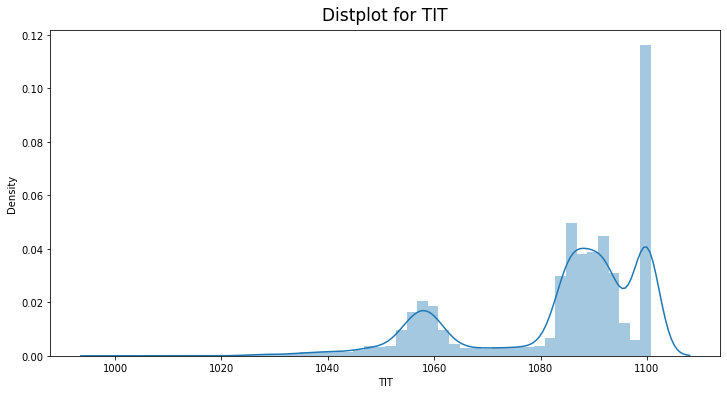

In [ ]:
plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(gas['TIT'])

<AxesSubplot:title={'center':'Distplot for TAT'}, xlabel='TAT', ylabel='Density'>

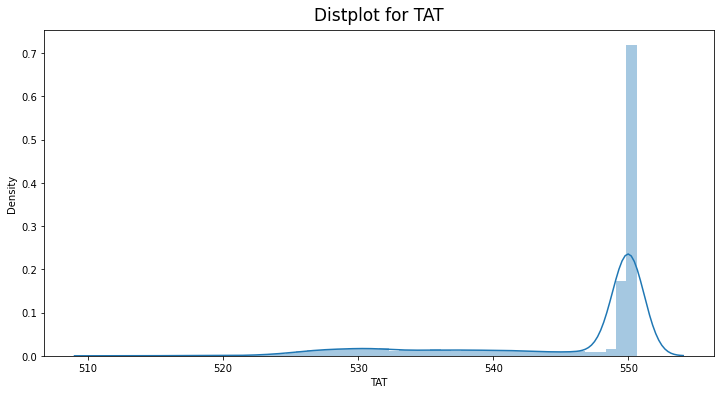

In [ ]:
plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(gas['TAT'])

<AxesSubplot:title={'center':'Distplot for CDP'}, xlabel='CDP', ylabel='Density'>

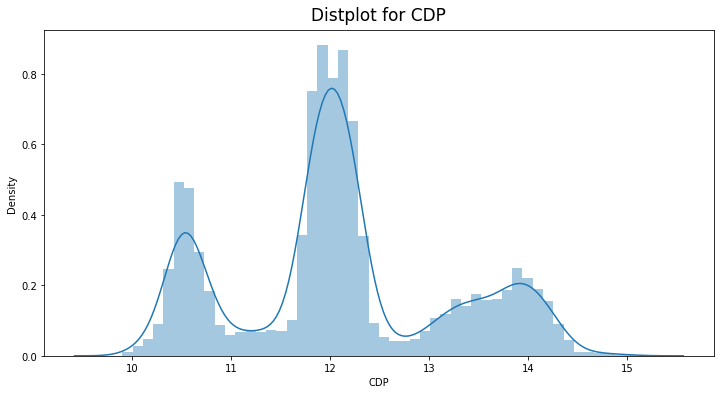

In [ ]:
plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(gas['CDP'])

<AxesSubplot:title={'center':'Distplot for CO'}, xlabel='CO', ylabel='Density'>

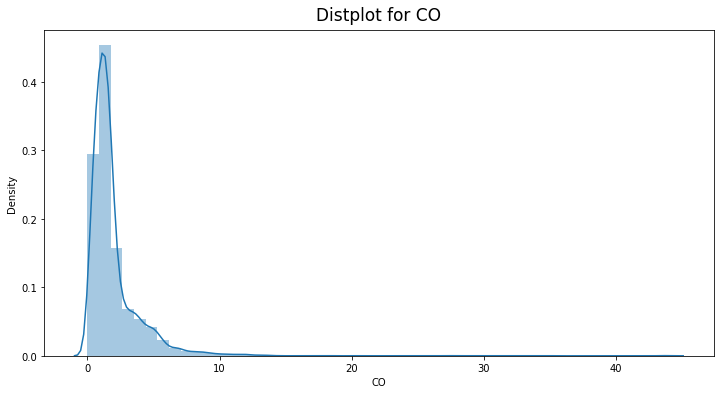

In [ ]:
plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(gas['CO'])

<AxesSubplot:title={'center':'Distplot for NOX'}, xlabel='NOX', ylabel='Density'>

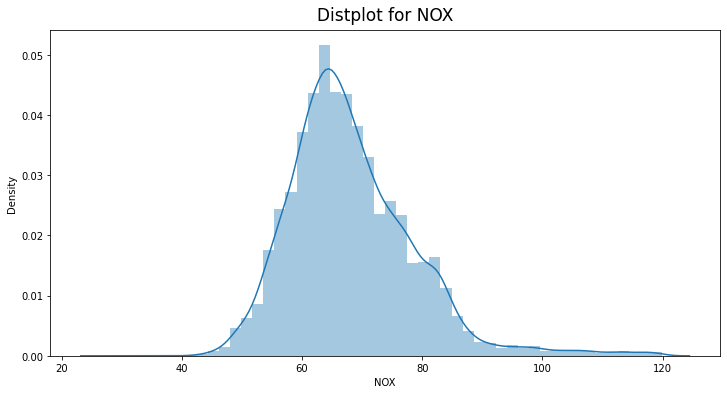

In [ ]:
plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(gas['NOX'])

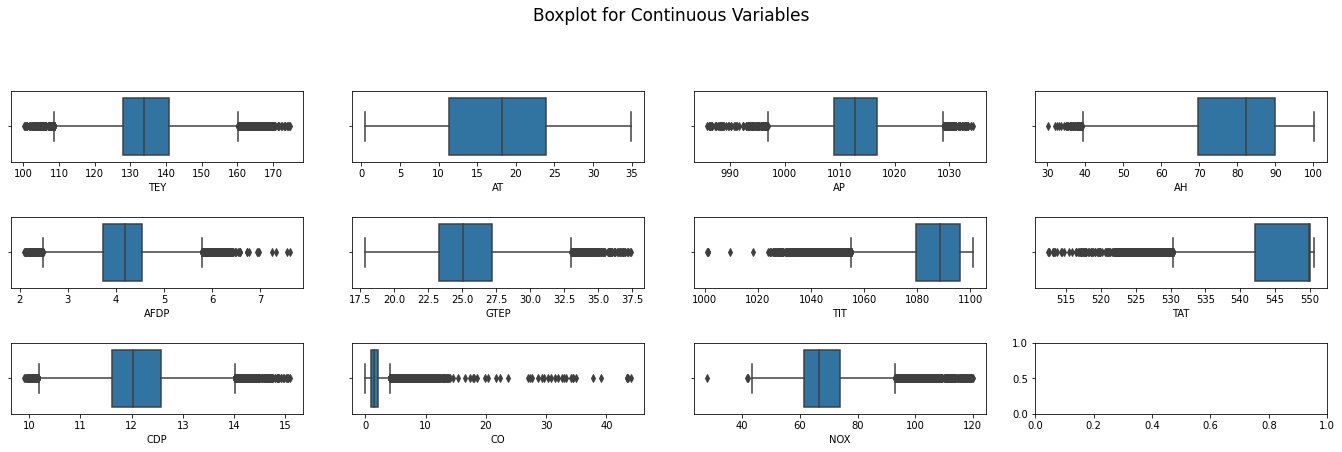

In [ ]:
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(gas.TEY, ax=ax[0,0])
sns.boxplot(gas.AT, ax=ax[0,1])
sns.boxplot(gas.AP, ax=ax[0,2])
sns.boxplot(gas.AH, ax=ax[0,3])
sns.boxplot(gas.AFDP, ax=ax[1,0])
sns.boxplot(gas.GTEP, ax=ax[1,1])
sns.boxplot(gas.TIT, ax=ax[1,2])
sns.boxplot(gas.TAT, ax=ax[1,3])
sns.boxplot(gas.CDP, ax=ax[2,0])
sns.boxplot(gas.CO, ax=ax[2,1])
sns.boxplot(gas.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

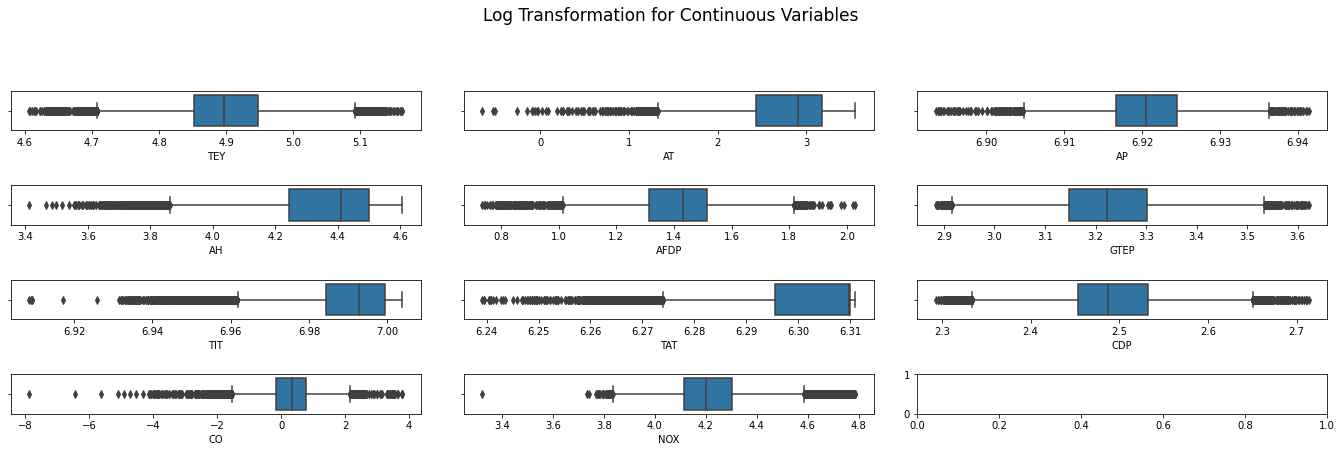

In [ ]:
import numpy as np
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(gas.TEY), ax=ax[0,0])
sns.boxplot(np.log(gas.AT), ax=ax[0,1])
sns.boxplot(np.log(gas.AP), ax=ax[0,2])
sns.boxplot(np.log(gas.AH), ax=ax[1,0])
sns.boxplot(np.log(gas.AFDP), ax=ax[1,1])
sns.boxplot(np.log(gas.GTEP), ax=ax[1,2])
sns.boxplot(np.log(gas.TIT), ax=ax[2,0])
sns.boxplot(np.log(gas.TAT), ax=ax[2,1])
sns.boxplot(np.log(gas.CDP), ax=ax[2,2])
sns.boxplot(np.log(gas.CO), ax=ax[3,0])
sns.boxplot(np.log(gas.NOX), ax=ax[3,1])
plt.suptitle("Log Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

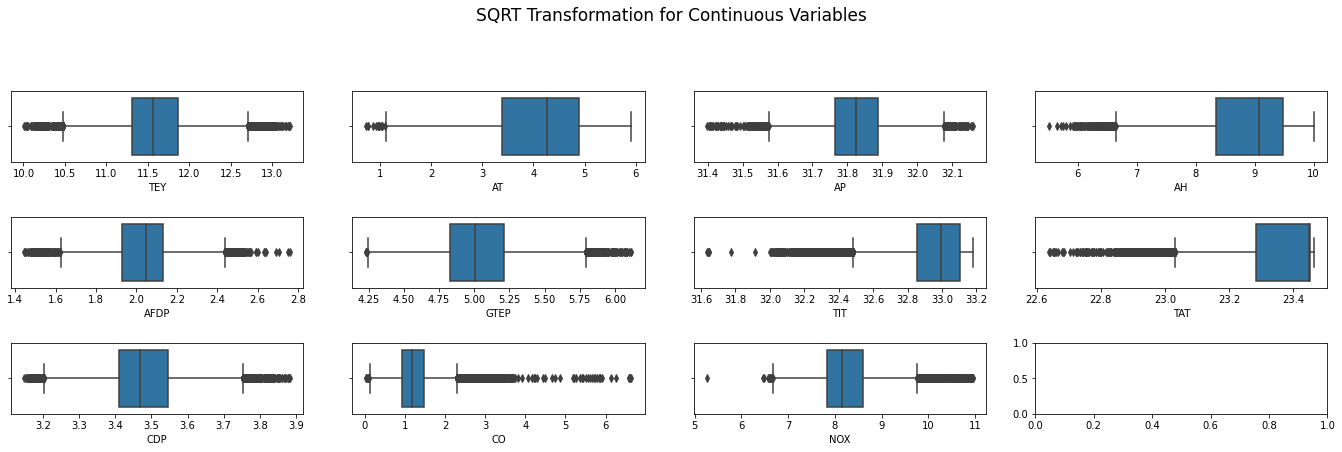

In [ ]:
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(gas.TEY), ax=ax[0,0])
sns.boxplot(np.sqrt(gas.AT), ax=ax[0,1])
sns.boxplot(np.sqrt(gas.AP), ax=ax[0,2])
sns.boxplot(np.sqrt(gas.AH), ax=ax[0,3])
sns.boxplot(np.sqrt(gas.AFDP), ax=ax[1,0])
sns.boxplot(np.sqrt(gas.GTEP), ax=ax[1,1])
sns.boxplot(np.sqrt(gas.TIT), ax=ax[1,2])
sns.boxplot(np.sqrt(gas.TAT), ax=ax[1,3])
sns.boxplot(np.sqrt(gas.CDP), ax=ax[2,0])
sns.boxplot(np.sqrt(gas.CO), ax=ax[2,1])
sns.boxplot(np.sqrt(gas.NOX), ax=ax[2,2])
plt.suptitle("SQRT Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

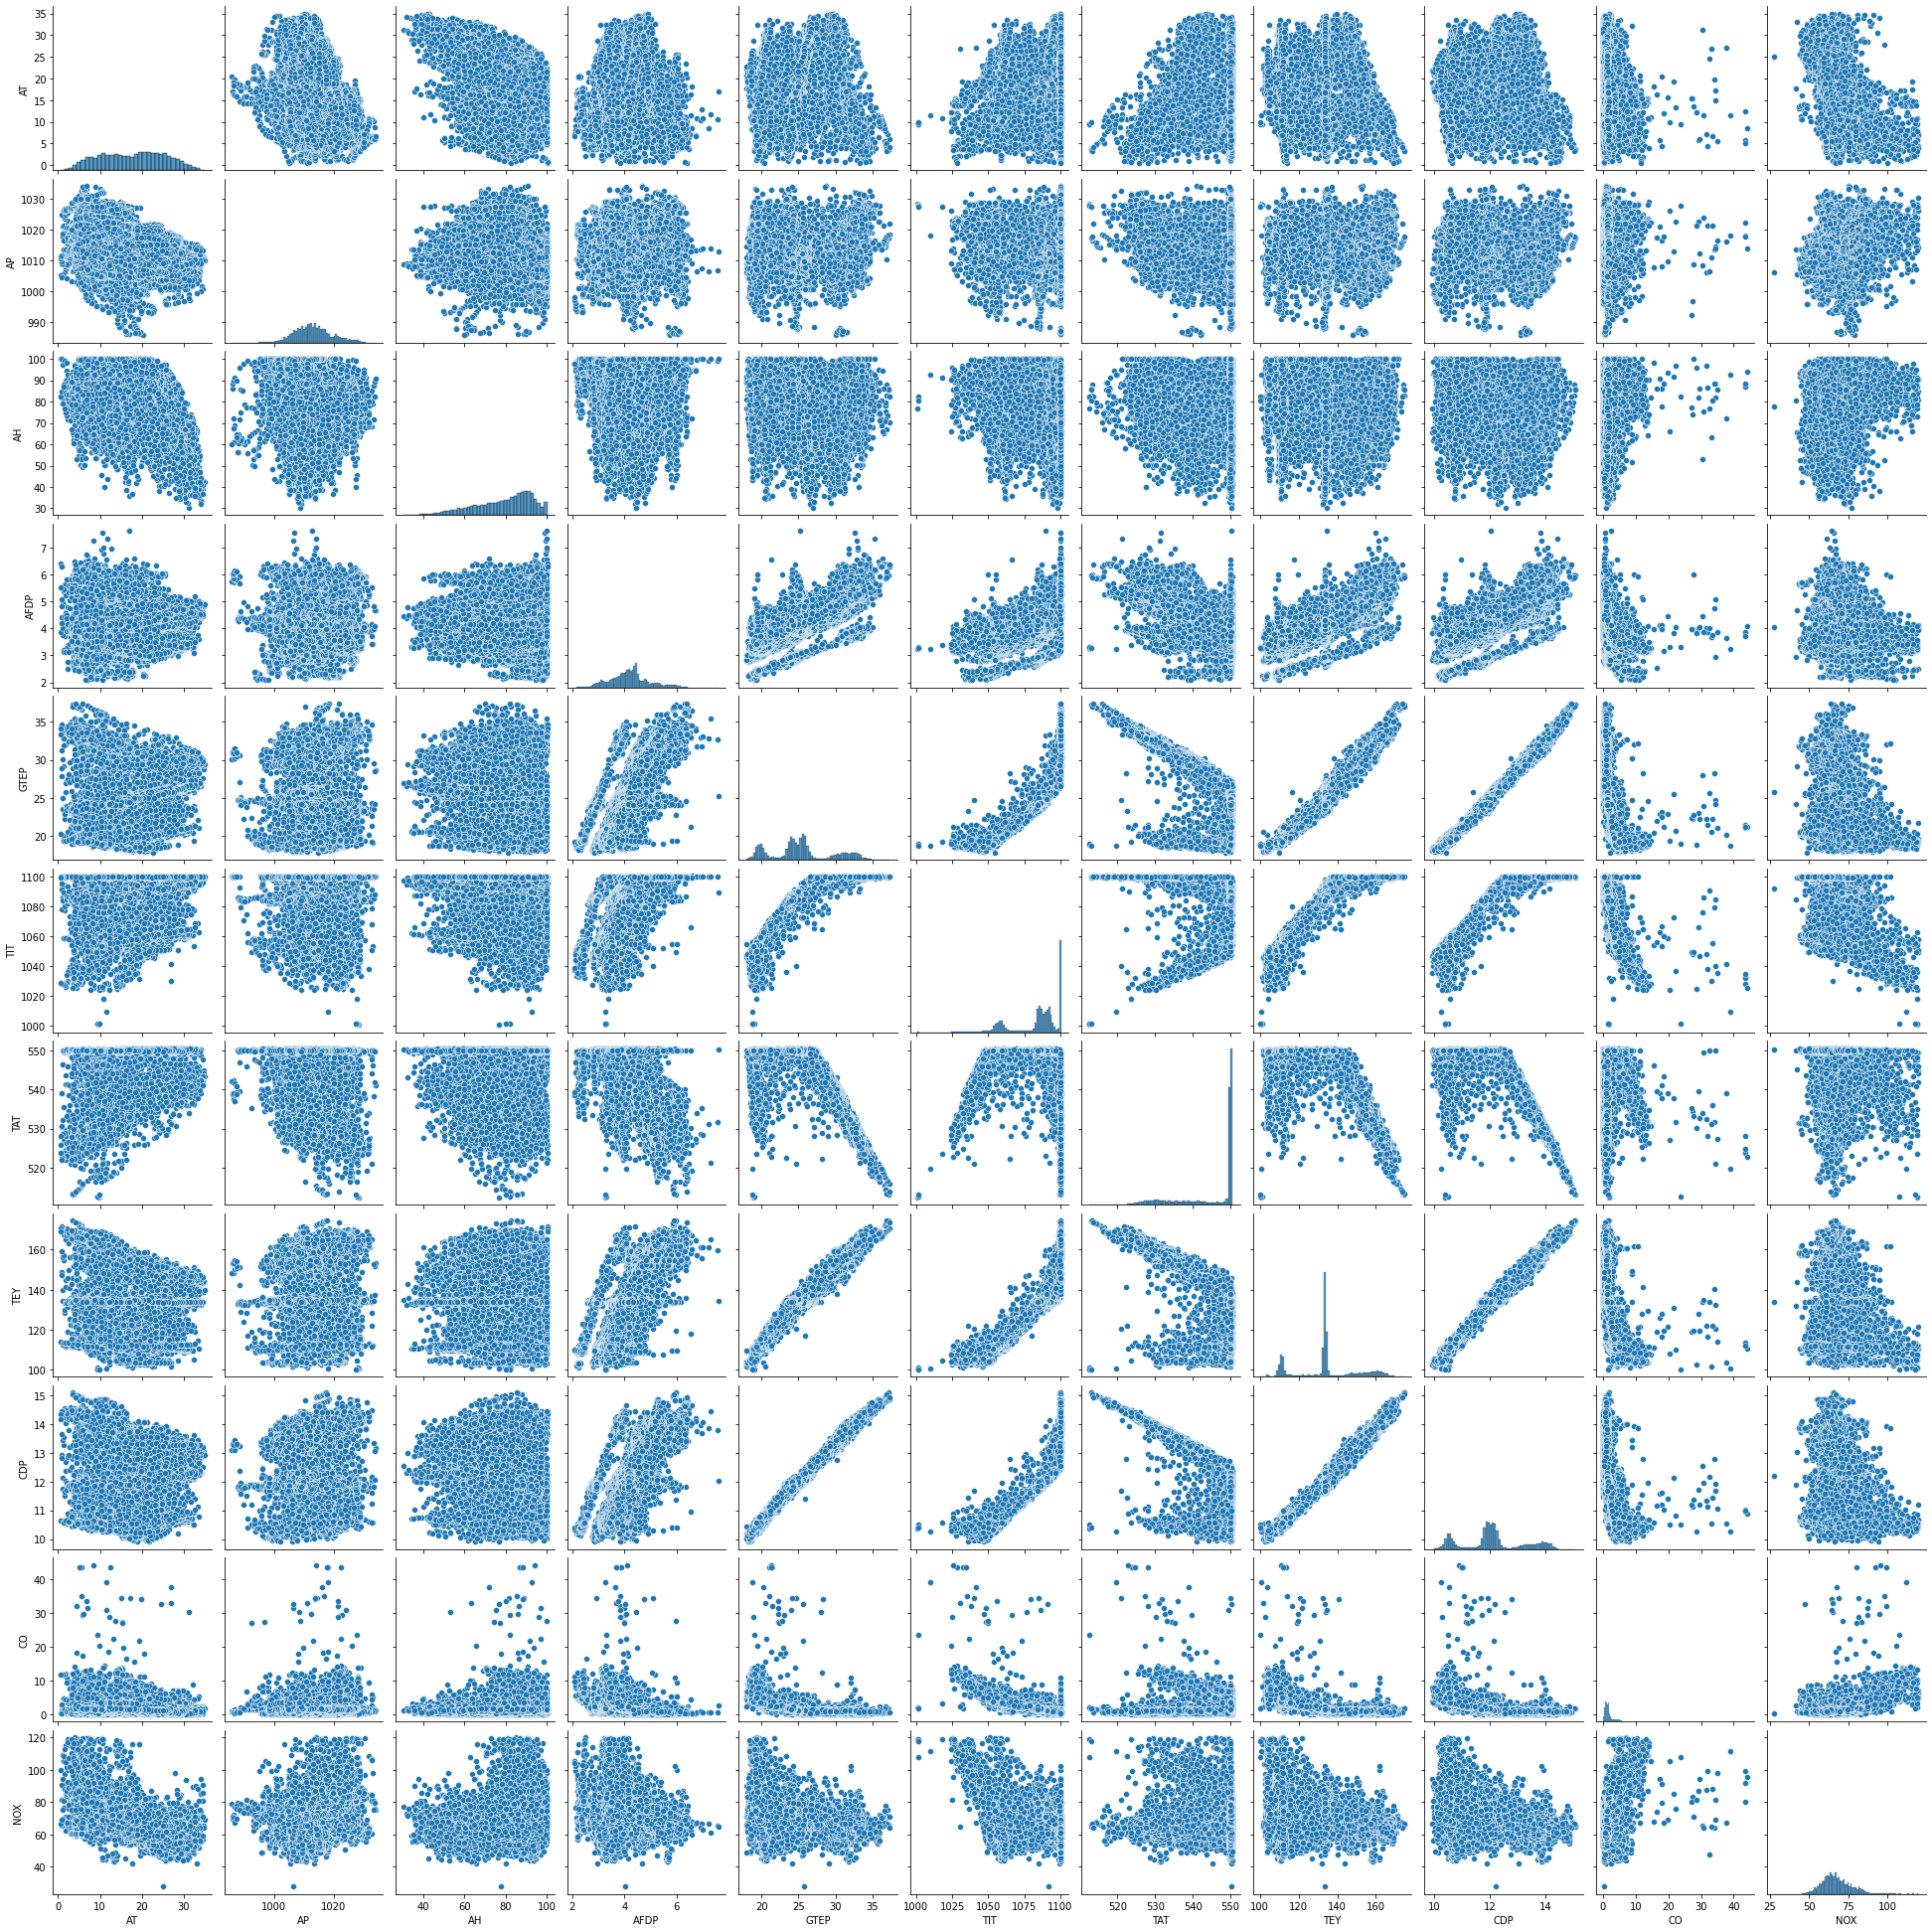

In [ ]:
sns.pairplot(gas)

In [ ]:
corr = pd.DataFrame(data = gas.corr().iloc[:,7], index=gas.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


<AxesSubplot:title={'center':'Correlation plot between Target variables and independent variables'}, ylabel='TEY'>

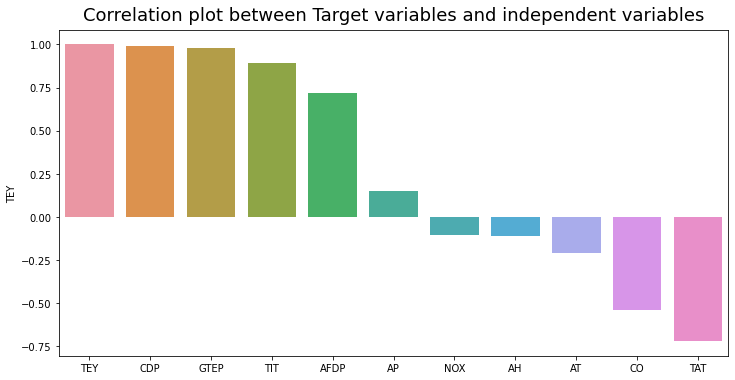

In [ ]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

Text(0.5, 1.0, 'Correlation Map of variables')

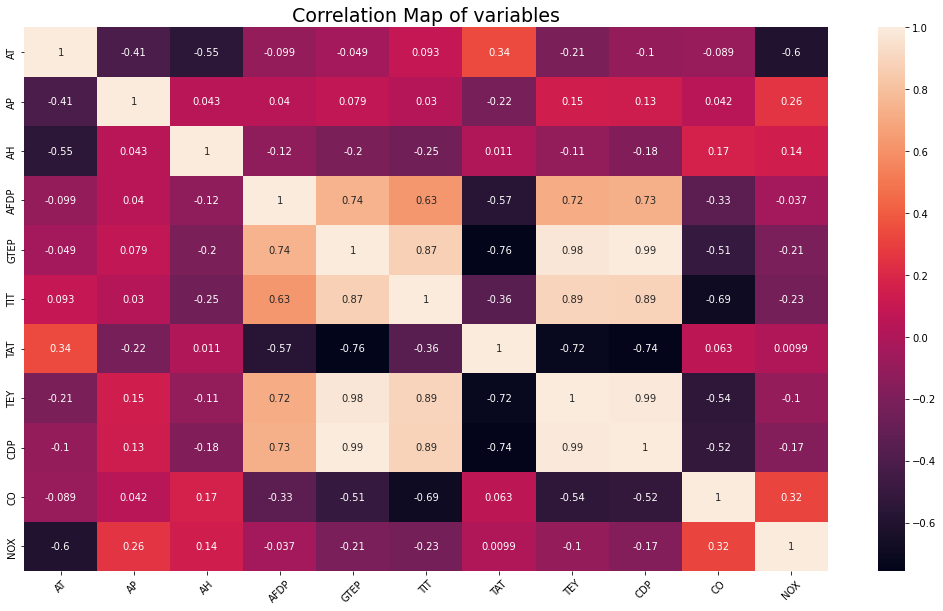

In [ ]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(gas.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

from correlation matrix we can see that TEY is highly correalte  with 'CDP','GTEP','TIT','AFDP'

hence we can drop 'AT', 'AP', 'AH', 'NOX' as they have very less impact on dependent variables

#Treating Outliers

In [ ]:
from sklearn.ensemble import IsolationForest
gas1=gas.copy()

clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(gas1)
gas1['anamoly'] = clf.predict(gas1.iloc[:,0:11])
outliers = gas1[gas1['anamoly']==-1]

In [ ]:
outliers

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,anamoly
261,5.66020,1018.30,86.968,3.8404,21.079,1028.5,523.86,112.02,10.963,43.4280,99.237,-1
553,3.55320,1027.30,90.871,4.2162,21.464,1041.2,531.68,117.76,10.984,8.8254,106.840,-1
763,1.81300,1007.20,74.980,3.6967,19.958,1026.4,528.18,111.72,10.553,12.0900,114.940,-1
764,1.49880,1006.30,76.734,3.7063,20.041,1027.6,528.79,112.28,10.585,11.6520,112.830,-1
765,0.97877,1005.70,78.978,3.7379,20.084,1027.9,528.52,112.71,10.628,11.6910,108.880,-1
993,4.36570,1021.60,85.528,3.9574,20.263,1025.6,525.72,111.35,10.652,12.7860,112.270,-1
6896,17.13200,1010.80,80.503,2.2148,18.484,1034.1,539.98,102.07,10.182,11.5150,110.760,-1
7019,7.02760,997.23,97.761,2.0992,19.227,1037.2,538.53,109.63,10.338,11.0440,105.060,-1
7470,7.04730,1019.60,96.885,2.4558,19.501,1032.0,532.32,109.21,10.567,11.3740,112.230,-1
9920,15.17900,1017.60,71.630,2.7816,18.435,1027.8,533.45,103.64,10.143,12.1440,113.800,-1


In [ ]:
gas.shape

(15039, 11)

In [ ]:
gas = gas.drop(outliers.index)
gas.shape

(15023, 11)

In [ ]:
gas = gas.reset_index()
gas = gas.drop('index', axis = 1)
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15018,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15019,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15020,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15021,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
gas = gas.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)

In [ ]:
gas.shape

(15023, 7)

Converting independent features into normalised and standardized data

In [ ]:
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(gas), columns=gas.columns)      #data between -3 to +3
df_std = pd.DataFrame(std.fit_transform(gas), columns=gas.columns)        #data between -1 to +1

In [ ]:
df_norm

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522
1,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372
2,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576
3,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375
4,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647
...,...,...,...,...,...,...,...
15018,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448
15019,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894
15020,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552
15021,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693


In [ ]:
df_std

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,-0.923012,-1.381262,-1.501236,0.584296,-1.234002,-1.359605,0.558318
1,-0.923275,-1.365681,-1.495148,0.584296,-1.232737,-1.365954,0.596348
2,-0.946177,-1.353456,-1.489061,0.567731,-1.233369,-1.363233,0.579990
3,-0.948678,-1.350340,-1.476885,0.583021,-1.232737,-1.358698,0.575842
4,-0.926171,-1.356812,-1.470797,0.581747,-1.232737,-1.353256,0.601987
...,...,...,...,...,...,...,...
15018,-0.867599,-1.500878,-2.079571,0.101373,-1.429387,-1.545539,1.193958
15019,-0.915246,-1.440950,-2.286555,-0.279614,-1.418637,-1.515608,1.347008
15020,-0.953285,-1.413144,-2.810100,-1.031393,-1.519176,-1.470258,2.799300
15021,-0.990666,-1.449820,-2.475275,-0.531906,-1.484398,-1.424908,2.000590


In [ ]:
temp = df_std.sample(frac=1)
temp_s = df_std.sample(frac=0.2)

In [ ]:
temp_s

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
1289,0.567480,-0.558573,-0.624601,0.196938,-0.365201,-0.584122,0.144749
8164,-0.478523,-0.446148,0.002436,0.600860,-0.032604,-0.392745,-0.298880
5662,0.364914,-0.031926,0.331174,0.609780,-0.054102,-0.012714,-0.380857
2062,2.298183,1.438943,0.988650,-1.343572,1.307904,1.256176,-0.352754
12207,-0.724920,-0.412828,-0.247162,0.521860,-0.646581,-0.507027,-0.525313
...,...,...,...,...,...,...,...
8235,-0.426269,-0.438477,0.087664,0.575376,-0.033868,-0.242184,-0.413340
3299,0.309764,0.022728,0.312911,0.577925,-0.026913,-0.123367,-0.141915
9108,1.604270,1.266111,1.000825,-1.125684,1.061301,1.370457,-0.266210
893,0.519701,0.002832,0.483367,0.586844,0.397371,0.011775,-0.526273


Splitting data into target variable and independent variables

In [ ]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

,AFDP,GTEP,TIT,TAT,CDP,CO
1289,0.567480,-0.558573,-0.624601,0.196938,-0.584122,0.144749
8164,-0.478523,-0.446148,0.002436,0.600860,-0.392745,-0.298880
5662,0.364914,-0.031926,0.331174,0.609780,-0.012714,-0.380857
2062,2.298183,1.438943,0.988650,-1.343572,1.256176,-0.352754
12207,-0.724920,-0.412828,-0.247162,0.521860,-0.507027,-0.525313
...,...,...,...,...,...,...
8235,-0.426269,-0.438477,0.087664,0.575376,-0.242184,-0.413340
3299,0.309764,0.022728,0.312911,0.577925,-0.123367,-0.141915
9108,1.604270,1.266111,1.000825,-1.125684,1.370457,-0.266210
893,0.519701,0.002832,0.483367,0.586844,0.011775,-0.526273


Creating train and test data for model validation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2253, 6), (752, 6), (2253,), (752,))

#Building Model

In [ ]:
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers.legacy import Adam

from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')

[]

In [ ]:
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("Predicted values:")
model2.predict(x_test[:10])

Predicted values:
1/1 [==============================] - 0s 329ms/step


array([[3.5666823e-04],
       [4.1249220e-04],
       [5.8535719e-04],
       [7.7131088e-05],
       [2.1314874e-04],
       [6.8490161e-05],
       [3.5800372e-04],
       [7.5128002e-05],
       [2.9556116e-04],
       [6.9182395e-05]], dtype=float32)

In [ ]:
print('Actual values')
y_test[:10]

Actual values


6107    -1.578613
1598     1.139076
1699     1.660735
8549    -0.076866
6699    -0.104055
11602   -0.092041
12656   -1.416741
13383    0.096389
1976    -1.486295
9043    -0.035765
Name: TEY, dtype: float64

In [ ]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

71/71 [==============================] - 0s 2ms/step - loss: 1.0006 - mse: 1.0006 - mae: 0.7121 - mape: 100.0235

 Results for model 2: 
 Training Loss: 1.000582218170166 
 Training Mean Absolute Error: 1.000582218170166 
 Training Mean Squared Error: 0.7120568752288818


In [ ]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)

24/24 [==============================] - 0s 3ms/step - loss: 1.0178 - mse: 1.0178 - mae: 0.7131 - mape: 100.1008

 Results for model 2: 
 Test Loss: 1.0178310871124268 
 Test Mean Absolute Error: 1.0178310871124268 
 Test Mean Squared Error: 0.7131298780441284


In [ ]:
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)
batch_size = [30,50,70]
epochs = [300,500,800]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=30, epochs=300...................................
[CV 1/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.007 total time=  41.9s
[CV 2/5; 1/9] START batch_size=30, epochs=300...................................
[CV 2/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.006 total time=  37.6s
[CV 3/5; 1/9] START batch_size=30, epochs=300...................................
[CV 3/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.009 total time=  38.8s
[CV 4/5; 1/9] START batch_size=30, epochs=300...................................
[CV 4/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.006 total time=  37.8s
[CV 5/5; 1/9] START batch_size=30, epochs=300...................................
[CV 5/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.009 total time=  41.8s
[CV 1/5; 2/9] START batch_size=30, epochs=500...................................
[CV 1/5; 2/9] END ...batch_size=30, epochs=500;, 

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.006371106021106243, using {'batch_size': 70, 'epochs': 500}
-0.007414516620337963,0.0013686907311249925 with: {'batch_size': 30, 'epochs': 300}
-0.007080602739006281,0.0012358356796486436 with: {'batch_size': 30, 'epochs': 500}
-0.007978572230786084,0.0017788162019064771 with: {'batch_size': 30, 'epochs': 800}
-0.011171542946249247,0.002885229615168242 with: {'batch_size': 50, 'epochs': 300}
-0.008113713283091784,0.0020330612800823137 with: {'batch_size': 50, 'epochs': 500}
-0.00711591262370348,0.0007862021083607128 with: {'batch_size': 50, 'epochs': 800}
-0.007602520100772381,0.0017941896979317901 with: {'batch_size': 70, 'epochs': 300}
-0.006371106021106243,0.0008022541949757347 with: {'batch_size': 70, 'epochs': 500}
-0.007095657102763653,0.0024230546969221172 with: {'batch_size': 70, 'epochs': 800}


In [ ]:
def create_model_three_hidden_layers(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse', optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0069280008785426615, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.0069280008785426615,0.0015826346879465902 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.008213129546493291,0.001966307433196558 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.8237078299745917,0.4052063568287818 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.008671802282333375,0.00110132996863948 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.015704954415559767,0.0044627605219437925 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.8702979862689972,0.32837246685191573 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.009507324360311032,0.0012531998868190123 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.030486221238970757,0.010311141105428719 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-1.0122344970703125,0.060401611114149864 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [ ]:
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
%%time
epochs=300
batch_size=70

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
    final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)


Here is the summary of our final model:
Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_469 (Dense)           (None, 8)                 56        
                                                                 
 dense_470 (Dense)           (None, 128)               1152      
                                                                 
 dense_471 (Dense)           (None, 64)                8256      
                                                                 
 dense_472 (Dense)           (None, 128)               8320      
                                                                 
 dense_473 (Dense)           (None, 1)                 129       
                                                                 
Total params: 17,913
Trainable params: 17,913
Non-trainable params: 0
_________________________________________________________________
CPU times

In [ ]:
loss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)


71/71 [==============================] - 0s 2ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0548 - mape: 109.3185

 Results for final model : 
 Training Loss: 0.005905789788812399 
 Training Mean Absolute Error: 0.005905789788812399 
 Training Mean Squared Error: 0.054772596806287766


In [ ]:
loss_t, mae_t, mse_t, mape_t = final_model.evaluate(x_test, y_test)
print('\n', "Results for final model :", '\n', "Test Loss:", loss_t, '\n', "Test Mean Absolute Error:" , mae_t, '\n', "Test Mean Squared Error:", mse_t)


24/24 [==============================] - 0s 2ms/step - loss: 0.0084 - mse: 0.0084 - mae: 0.0635 - mape: 86.2808

 Results for final model : 
 Test Loss: 0.008407213725149632 
 Test Mean Absolute Error: 0.008407213725149632 
 Test Mean Squared Error: 0.06351735442876816


Predicting values from Model using same dataset

In [ ]:
y_predict_test = final_model.predict(x_test)

predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

24/24 [==============================] - 0s 1ms/step
(752, 8)


,AFDP,GTEP,TIT,TAT,CDP,CO,Actual,Predicted
6107,-0.782571,-1.409548,-1.696044,0.593215,-1.431257,1.814545,-1.578613,-1.581848
1598,2.322797,1.479215,0.976474,-1.203410,1.237129,-0.136183,1.139076,1.153424
1699,2.379658,1.593797,0.958211,-1.798463,1.602649,-0.654365,1.660735,1.545860
8549,0.189724,-0.201642,0.312911,0.599586,-0.128809,-0.632452,-0.076866,0.021874
6699,-1.812253,-0.278110,0.130278,0.595763,-0.151484,-0.182694,-0.104055,-0.005146
11602,-0.601195,-0.014188,0.361613,0.542247,-0.029946,-0.524562,-0.092041,-0.022033
12656,-1.353812,-1.270755,-1.422095,0.565183,-1.277975,0.224956,-1.416741,-1.390140
13383,-0.155916,0.033515,0.507718,0.547344,-0.037202,-0.342501,0.096389,-0.010895
1976,0.042570,-1.459408,-1.945641,0.385520,-1.589075,1.390583,-1.486295,-1.583419
9043,-0.029296,-0.406356,0.032875,0.604683,-0.380954,-0.481742,-0.035765,-0.027744


Visualizing the Relationship between the Actual and Predicted Values Model Validation

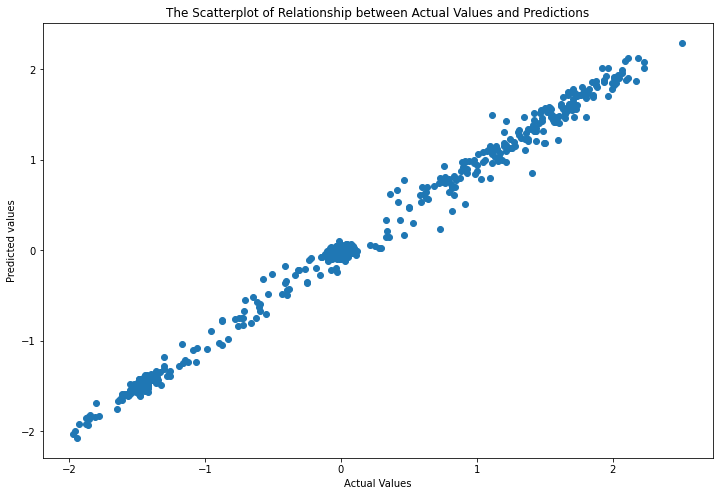

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])